# **Guía 3**

Integrantes:

Oscar Gavidia  
Jose Motta

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

# 1  **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

## a. Importacion del dataset

In [4]:
import pandas as pd

with open("accidents-1.csv", "r", encoding="utf-8") as infile, open("accidents_clean.csv", "w", encoding="utf-8") as outfile:
    for line in infile:
        cleaned_line = line.replace(";;", ";").strip()  # Reemplaza dobles delimitadores o espacios extra
        outfile.write(cleaned_line + "\n")

data = pd.read_csv("accidents_clean.csv", delimiter=";")  # Usa el delimitador correcto

# Identificar columnas con valores nulos
null_columns = data.columns[data.isnull().any()]
print("Columnas con valores nulos:")
data

C:\Users\OSCAR\AppData\Local\Temp\ipykernel_18452\3645898823.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("accidents_clean.csv", delimiter=";")  # Usa el delimitador correcto


Columnas con valores nulos:


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,0,0,0,0,...,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.75549,-73.93953,0,0,0,0,...,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,MAIN STREET,0,0,1,0,...,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.90127,0,0,0,0,...,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.79723,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.84518,-73.91417,JEROME AVENUE,0,0,0,...,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.83121,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.75725,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN


## b. lectura e identificacion de nullos en cada columa 

data.isnull(): Devuelve un DataFrame de la misma forma que data, pero con valores True donde hay valores nulos (NaN) y False en los demás casos.
.sum(): Suma los valores True (que equivalen a 1 en Python) en cada columna, proporcionando el total de valores nulos por columna.

In [5]:
# Paso 1: Identificar valores faltantes
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])
missing_values

Valores nulos por columna:
 ZIP CODE                              5
LATITUDE                           6977
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64


DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                              5
LATITUDE                           6977
LONGITUDE                             0
ON STREET NAME                        0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64

## 1.1 Imputacion de datos para ZIP CODE por medio de la moda

realiza la imputación de los valores faltantes en la columna "ZIP CODE" utilizando la moda (el valor más frecuente) dentro de cada grupo de "BOROUGH".

Explicación paso a paso:  
data.groupby("BOROUGH")["ZIP CODE"]  

Agrupa los datos por la columna "BOROUGH", es decir, organiza los registros según el municipio.  
.transform(lambda x: ...)  
 
Aplica una transformación a cada grupo por separado, permitiendo modificar los valores de "ZIP CODE" dentro de cada grupo.  
x.mode()[0] if not x.mode().empty else "Unknown"  

Calcula la moda (.mode()) de los valores en la columna "ZIP CODE" para cada municipio.  
Si la moda existe, toma el primer valor ([0]) y lo usa para rellenar los valores NaN (fillna()).  
Si no hay moda (por ejemplo, si todos los valores son nulos en un grupo), asigna "Unknown" como valor por defecto.  

In [6]:
# Paso 2: Imputación de valores faltantes

# Imputar ZIP CODE con la moda dentro de cada BOROUGH
data["ZIP CODE"] = data.groupby("BOROUGH")["ZIP CODE"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

# Paso 1: Identificar valores faltantes
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])
missing_values

Valores nulos por columna:
 LATITUDE                           6977
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64


DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                           6977
LONGITUDE                             0
ON STREET NAME                        0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64

## 1.2 Imputacion de datos por media para el campo de Latitude y Longitude

In [7]:
# Convertir LATITUDE y LONGITUDE a tipo numérico (para evitar errores de tipo)
data["LATITUDE"] = pd.to_numeric(data["LATITUDE"], errors="coerce")
data["LONGITUDE"] = pd.to_numeric(data["LONGITUDE"], errors="coerce")

# Imputar LATITUDE y LONGITUDE con la media dentro de cada BOROUGH
data["LATITUDE"] = data.groupby("BOROUGH")["LATITUDE"].transform(lambda x: x.fillna(x.mean()))
data["LONGITUDE"] = data.groupby("BOROUGH")["LONGITUDE"].transform(lambda x: x.fillna(x.mean()))

# Paso 1: Identificar valores faltantes
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])
missing_values

Valores nulos por columna:
 NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64


DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                              0
LONGITUDE                             0
ON STREET NAME                        0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1     20114
CONTRIBUTING FACTOR VEHICLE 2    104641
CONTRIBUTING FACTOR VEHICLE 3    144128
CONTRIBUTING FACTOR VEHICLE 4      7941
CONTRIBUTING FACTOR VEHICLE 5     28527
COLLISION_ID                     114173
VEHICLE TYPE CODE 1              225911
VEHICLE TYPE CODE 2              229875
VEHICLE TYPE CODE 3              236588
VEHICLE TYPE CODE 4              237760
VEHICLE TYPE CODE 5              238070
dtype: int64

## 1.3 Rellenado de datos para columnas especificas. 

La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.   
Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".  
Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [8]:
# Rellenar ON STREET NAME con "UNKNOWN"
data["ON STREET NAME"].fillna("UNKNOWN", inplace=True)

# Rellenar CONTRIBUTING FACTOR VEHICLE X con "Unspecified"
factor_cols = [col for col in data.columns if "CONTRIBUTING FACTOR VEHICLE" in col]
for col in factor_cols:
    data[col].fillna("Unspecified", inplace=True)

# Rellenar VEHICLE TYPE CODE X con "Unknown"
vehicle_cols = [col for col in data.columns if "VEHICLE TYPE CODE" in col]
for col in vehicle_cols:
    data[col].fillna("Unknown", inplace=True)

# Guardar el conjunto de datos limpio
data.to_csv("accidents_cleaned.csv", index=False)

print("Proceso de imputación completado. Datos guardados en 'accidents_cleaned.csv'")


# Paso 1: Identificar valores faltantes
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])
missing_values

Proceso de imputación completado. Datos guardados en 'accidents_cleaned.csv'
Valores nulos por columna:
 NUMBER OF MOTORIST INJURED        10
NUMBER OF MOTORIST KILLED        755
COLLISION_ID                  114173
dtype: int64


DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                              0
LONGITUDE                             0
ON STREET NAME                        0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED           10
NUMBER OF MOTORIST KILLED           755
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
CONTRIBUTING FACTOR VEHICLE 3         0
CONTRIBUTING FACTOR VEHICLE 4         0
CONTRIBUTING FACTOR VEHICLE 5         0
COLLISION_ID                     114173
VEHICLE TYPE CODE 1                   0
VEHICLE TYPE CODE 2                   0
VEHICLE TYPE CODE 3                   0
VEHICLE TYPE CODE 4                   0
VEHICLE TYPE CODE 5                   0
dtype: int64

In [9]:
data  

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,0,0,0,0,...,Unspecified,3988123,Sedan,Unspecified,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,3987962,Sedan,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,0,0,0,0,...,Unspecified,4193132,Sedan,Unspecified,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.548926,-73.237664,0,0,1,0,...,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,0,0,0,0,...,Unspecified,4192111,Sedan,Sedan,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,Unspecified,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown,Unknown,Unknown
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,Unspecified,Unspecified,3822315,SPORT UTILITY / STATION WAGON,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,Unspecified,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,Unknown,Unknown,Unknown,Unknown,Unknown
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,Unspecified,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown,Unknown,Unknown


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [ ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [ ] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

Para responder a la pregunta sobre qué iniciativas podrían beneficiarse del análisis de los datos de accidentes, identificamos las columnas más relevantes:

1. **Detección automatizada de peatones**

Columnas: "PERSONS INJURED", "PERSONS KILLED", "PEDESTRIANS INJURED", "PEDESTRIANS KILLED"  
Razón: Permiten identificar cruces peligrosos donde se reportan más accidentes con peatones.

2. **Auditorías de seguridad vial en zonas con alta incidencia de accidentes**

Columnas: "LATITUDE", "LONGITUDE", "BOROUGH", "ZIP CODE"  
Razón: Permiten geolocalizar y analizar los lugares con más accidentes para realizar auditorías específicas.

3.  **Expansión de la red de carriles para bicicletas**

Columnas: "CYCLISTS INJURED", "CYCLISTS KILLED", "LATITUDE", "LONGITUDE"  
Razón: Identifican zonas con alto riesgo para ciclistas, lo que ayuda a planificar infraestructura segura.

4.  **Programas de educación y sensibilización**

Columnas: "CONTRIBUTING FACTOR VEHICLE X"  
Razón: Permiten identificar causas comunes de accidentes (ej., distracción, exceso de velocidad) y orientar campañas educativas.

5.  **Construcción de islas de refugio peatonal**

Columnas: "PEDESTRIANS INJURED", "PEDESTRIANS KILLED", "ON STREET NAME", "CROSS STREET NAME"  
Razón: Indican calles con alto riesgo para peatones donde podrían implementarse medidas de seguridad.

6  **Implementación de reductores de velocidad inteligentes**

Columnas: "CONTRIBUTING FACTOR VEHICLE X", "LATITUDE", "LONGITUDE", "SPEEDING INVOLVED"  
Razón: Detectan zonas donde la velocidad es un factor clave en los accidentes.

En conclusión, todas las iniciativas pueden beneficiarse del análisis de datos disponibles, pero algunas columnas como "LATITUDE", "LONGITUDE", "PEDESTRIANS INJURED", "CYCLISTS INJURED" y "CONTRIBUTING FACTOR VEHICLE X" serán clave para diferentes estrategias de seguridad vial. 🚦

**Respuestas**


- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.


### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


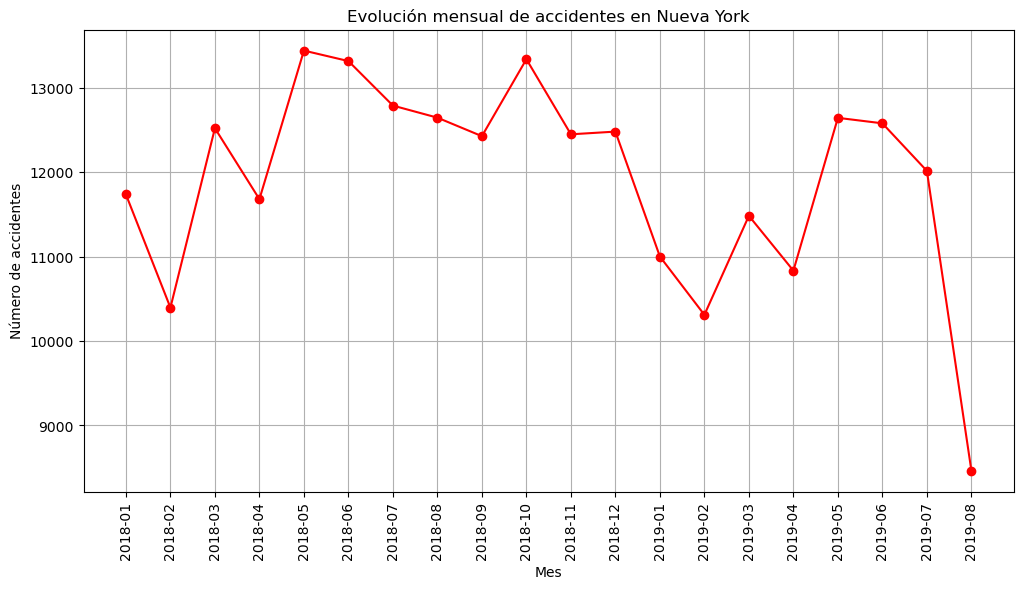

In [10]:
# Solución propuesta

import matplotlib.pyplot as plt

# Convertir la columna de fecha a formato datetime
data["DATE"] = pd.to_datetime(data["DATE"], errors="coerce")

# Agrupar los accidentes por mes
data["MONTH"] = data["DATE"].dt.to_period("M")
accidentes_mensuales = data.groupby("MONTH").size()

# Graficar la evolución de los accidentes a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(accidentes_mensuales .index.astype(str), accidentes_mensuales , marker='o', color= 'red', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Mes")
plt.ylabel("Número de accidentes")
plt.title("Evolución mensual de accidentes en Nueva York")
plt.grid()
plt.show()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

Los meses que parecen tener el menor número de accidentes según los datos proporcionados son:

- Febrero de 2018 (10,395 accidentes)
- Febrero de 2019 (10,310 accidentes)
- Agosto de 2019 (8,466 accidentes)

Las posibles razones detrás de esto podrían ser:

1. **Febrero**: Este mes tiene menos días (28 o 29 días) en comparación con otros meses, lo que naturalmente puede resultar en un menor número de accidentes reportados.

2. **Agosto de 2019**: Podría ser debido a varios factores, como:
    - **Vacaciones de verano**: Muchas personas pueden estar de vacaciones, lo que reduce el tráfico en la ciudad.
    - **Condiciones climáticas**: El clima en agosto suele ser más estable, lo que puede resultar en menos accidentes relacionados con condiciones climáticas adversas.
    - **Eventos especiales**: Podría haber eventos o campañas específicas de seguridad vial que se llevaron a cabo durante este mes, reduciendo el número de accidentes.

Estas son algunas hipótesis que podrían explicar la disminución en el número de accidentes durante estos meses.

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

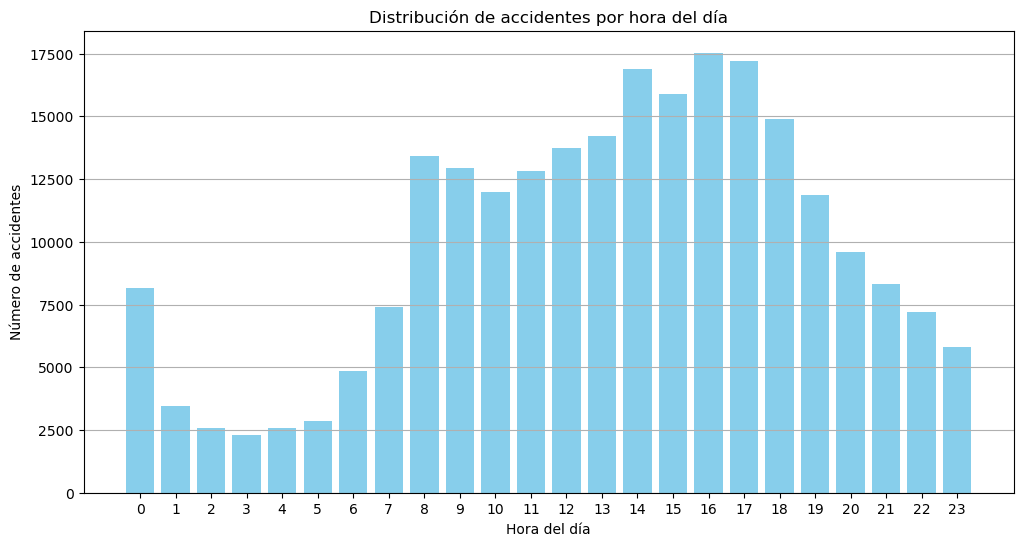

In [11]:

# Solución propuesta


# Convertir la columna TIME a formato datetime y extraer la hora
data["TIME"] = pd.to_datetime(data["TIME"], format="%H:%M", errors="coerce")
data["HOUR"] = data["TIME"].dt.hour

# Contar accidentes por hora
time_distribution = data["HOUR"].value_counts().sort_index()

# Graficar la distribución de accidentes por hora del día
plt.figure(figsize=(12, 6))
plt.bar(time_distribution.index, time_distribution, color='skyblue')
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes por hora del día")
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()



En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?


**Respuesta** 

- El enfoque es relativo dado que solo hace alusion a la hora y suprime de tajo la fecha a fin de poder establece algun contexto como; mayor cantidad de vehiculos en el tiempo mas probabilidad de que se materialice el accidente, ideal si se es explicito en analizar esta circustancia dentro del rango de tiempo de los datos 

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

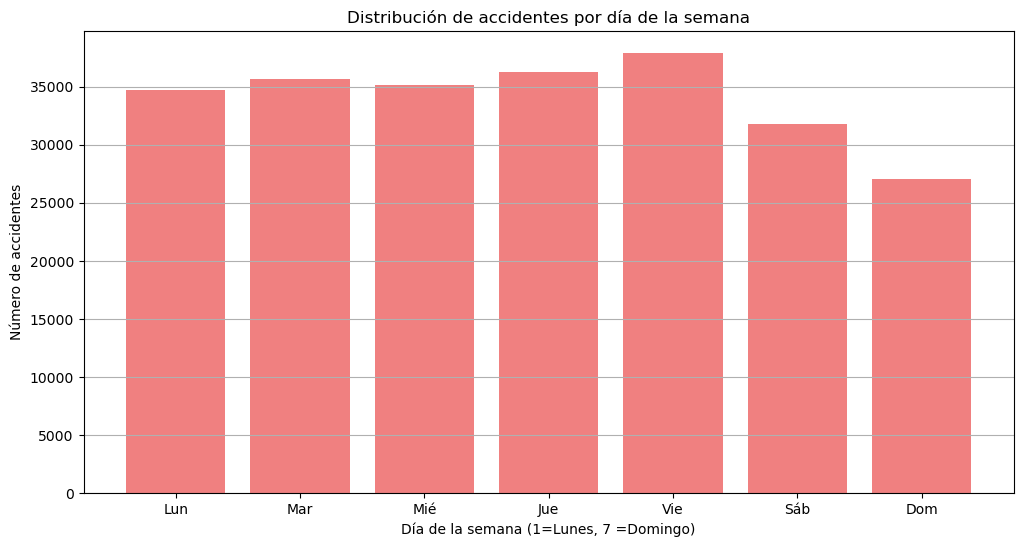

In [12]:
# Solución propuesta

import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'DATE' esté en formato datetime
data["DATE"] = pd.to_datetime(data["DATE"], errors='coerce')

# Extraer el día de la semana y contar accidentes por día
data["WEEKDAY"] = data["DATE"].dt.weekday
accidentes_semanales = data["WEEKDAY"].value_counts().sort_index()

# Graficar la distribución de accidentes por día de la semana
plt.figure(figsize=(12, 6)) # tamaño de la figura
plt.bar(accidentes_semanales .index, accidentes_semanales , color='lightcoral')
plt.xlabel("Día de la semana (1=Lunes, 7 =Domingo)")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes por día de la semana")
plt.xticks(ticks=range(7), labels=["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"])
plt.grid(axis='y')
plt.show()

El uso de las funciones de tiempo es excelente dado que ofrece alternativas que dificilmente se localizaban en excel **muy util**

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

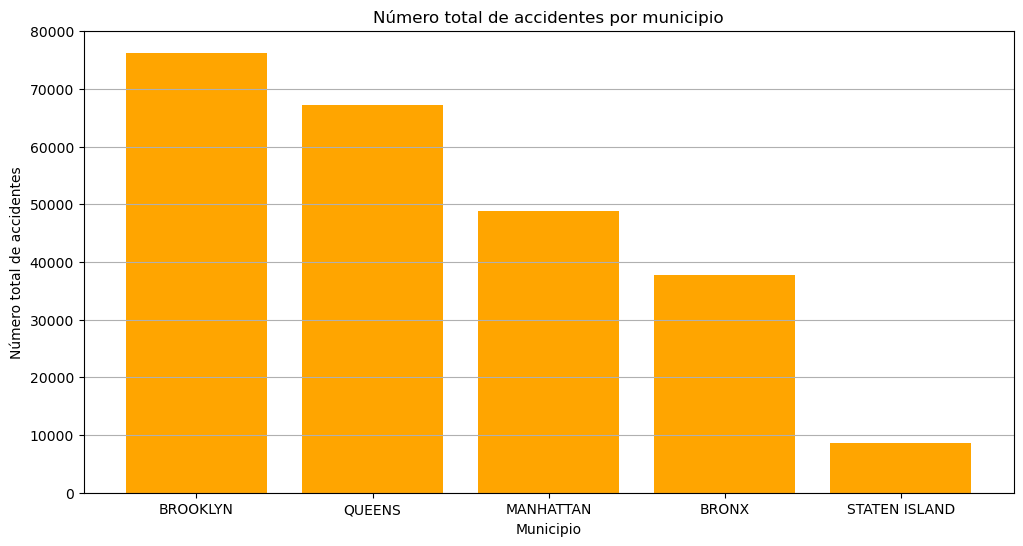

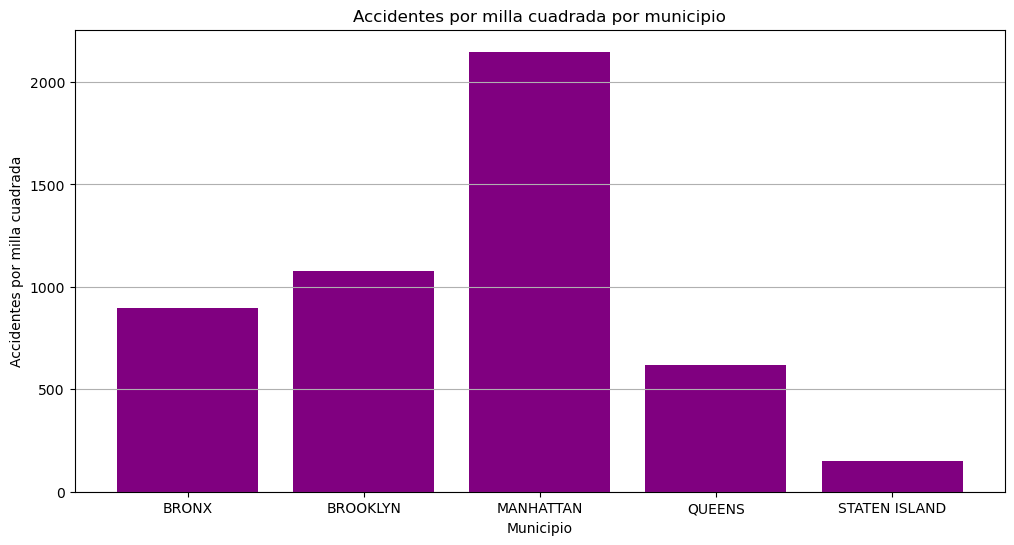

In [13]:
# Solución propuesta

# Calcular número total de accidentes por municipio
borough_accidents = data["BOROUGH"].value_counts()

# Definir área aproximada de cada municipio en millas cuadradas
borough_areas = {
    "BRONX": 42.0,
    "BROOKLYN": 70.8,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 58.5
}

# Calcular accidentes por milla cuadrada
borough_accidents_density = borough_accidents / pd.Series(borough_areas)

# Graficar número total de accidentes por municipio
plt.figure(figsize=(12, 6))
plt.bar(borough_accidents.index, borough_accidents, color='orange')
plt.xlabel("Municipio")
plt.ylabel("Número total de accidentes")
plt.title("Número total de accidentes por municipio")
plt.grid(axis='y')
plt.show()

# Graficar accidentes por milla cuadrada por municipio
plt.figure(figsize=(12, 6))
plt.bar(borough_accidents_density.index, borough_accidents_density, color='purple')
plt.xlabel("Municipio")
plt.ylabel("Accidentes por milla cuadrada")
plt.title("Accidentes por milla cuadrada por municipio")
plt.grid(axis='y')
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

**Esto podria deberse a q manhattan es mas pequeño por lo tanto en el analisis de densidad su valor sera mas alto en terminos de accidentes  / area**


### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

<Figure size 1200x600 with 0 Axes>

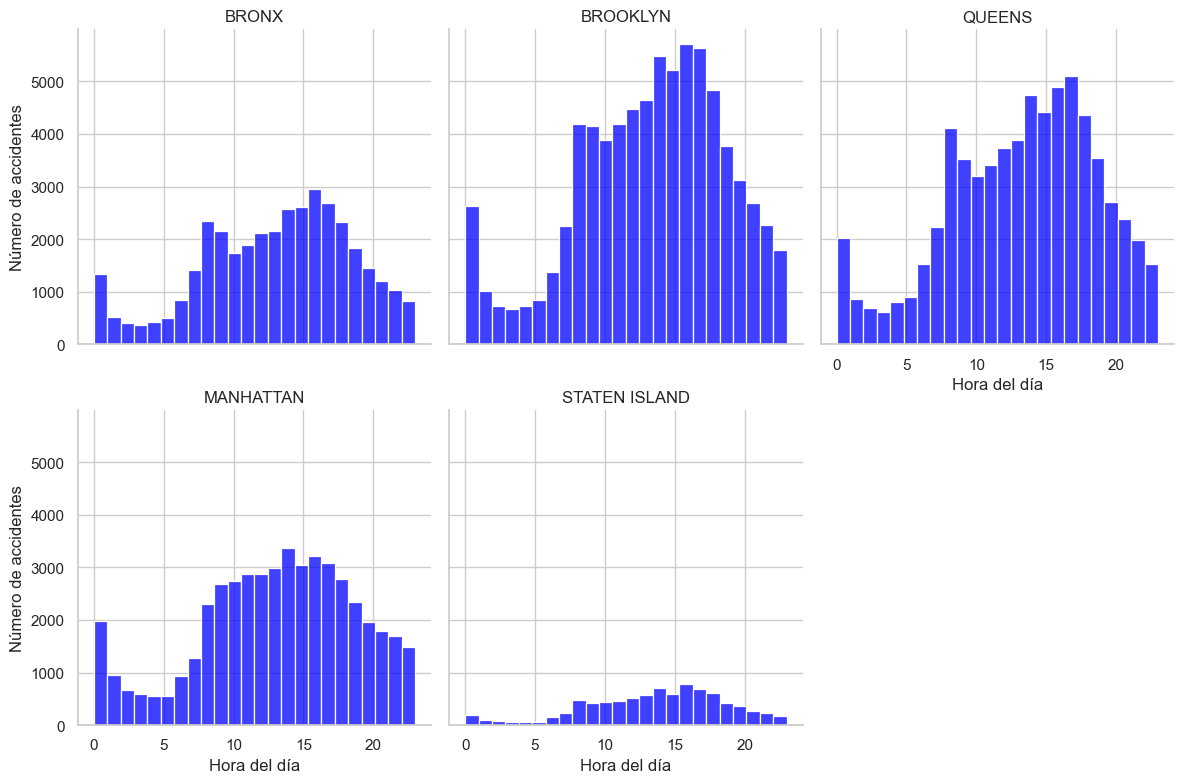

In [14]:
# Solución propuesta
import seaborn as sns 
# Graficar accidentes por hora para cada municipio
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = sns.FacetGrid(data, col="BOROUGH", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="HOUR", bins=24, color="blue")
g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles(col_template="{col_name}")
plt.show()

sns.FacetGrid es una función de Seaborn que permite crear una cuadrícula de gráficos basada en categorías dentro de un conjunto de datos. Se usa para visualizar la distribución de una variable en diferentes subconjuntos de datos.

**¿Cómo funciona?**
División en paneles: Separa los datos en distintos grupos según una variable categórica y genera un gráfico por cada categoría.  
Consistencia visual: Mantiene los mismos ejes y escalas para facilitar la comparación.  
Flexibilidad: Permite mapear diferentes tipos de gráficos dentro de cada panel.  
**Parámetros clave**  
col: Variable categórica que define las columnas (ej. "BOROUGH" en tu código).  
row: Variable categórica que define las filas (opcional).  
col_wrap: Número de gráficos por fila antes de hacer un salto de línea.  
sharex y sharey: Controlan si los ejes se comparten entre gráficos.  
hue: Diferencia categorías con colores.  
palette: Define la paleta de colores a usar.  

<Figure size 1200x600 with 0 Axes>

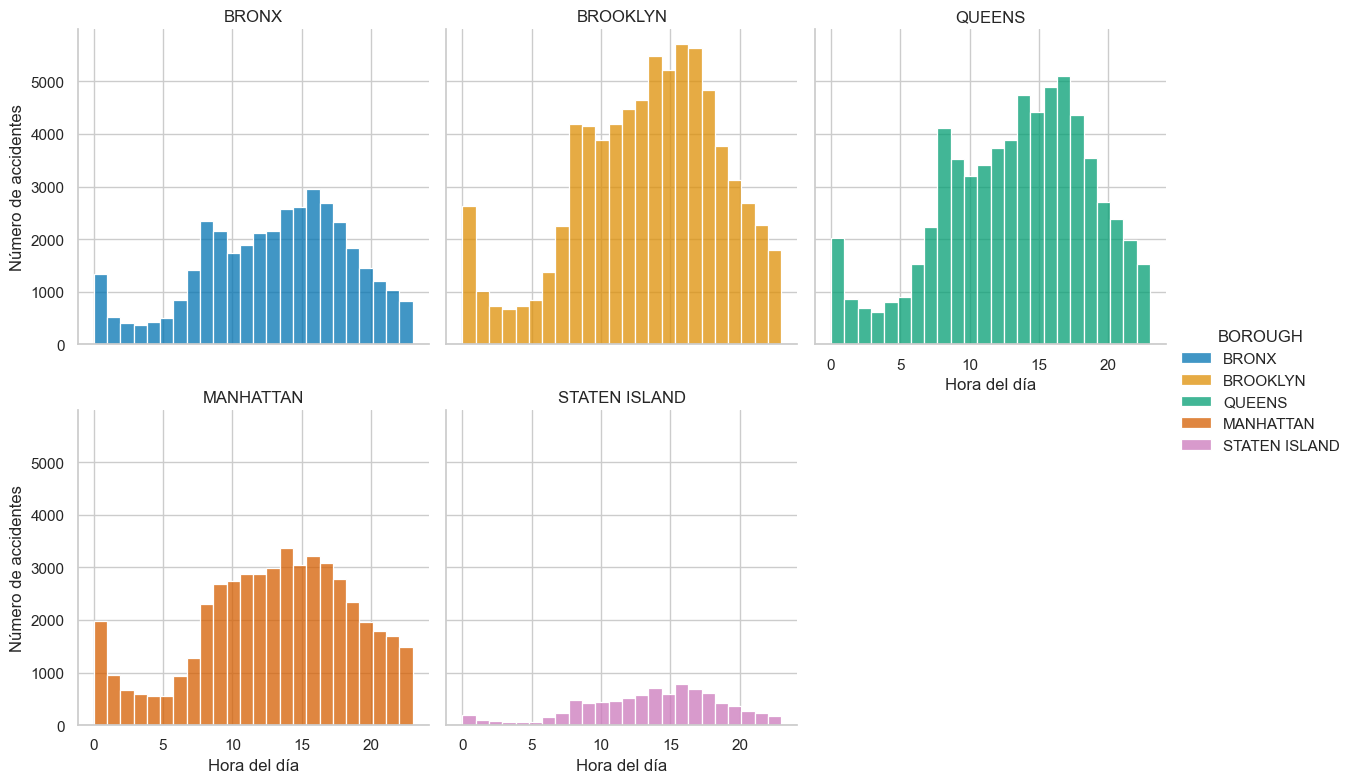

In [15]:
# Graficar accidentes por hora para cada municipio con colores diferenciados
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = sns.FacetGrid(data, col="BOROUGH", col_wrap=3, height=4, sharex=True, sharey=True, hue="BOROUGH", palette="colorblind")
g.map_dataframe(sns.histplot, x="HOUR", bins=24)
g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Las graficas son similares dado que los accidentes se concentran en la tarde, con pikos a la mayor hora de transito considerando que esta se presenta cuando se sale de trabajo o horas tope, no obstante es notorio que existe un numero importante en la hora cero o pasada la media noche, aspecto que puede ser constatado vs el dia especifico de la semana. 

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

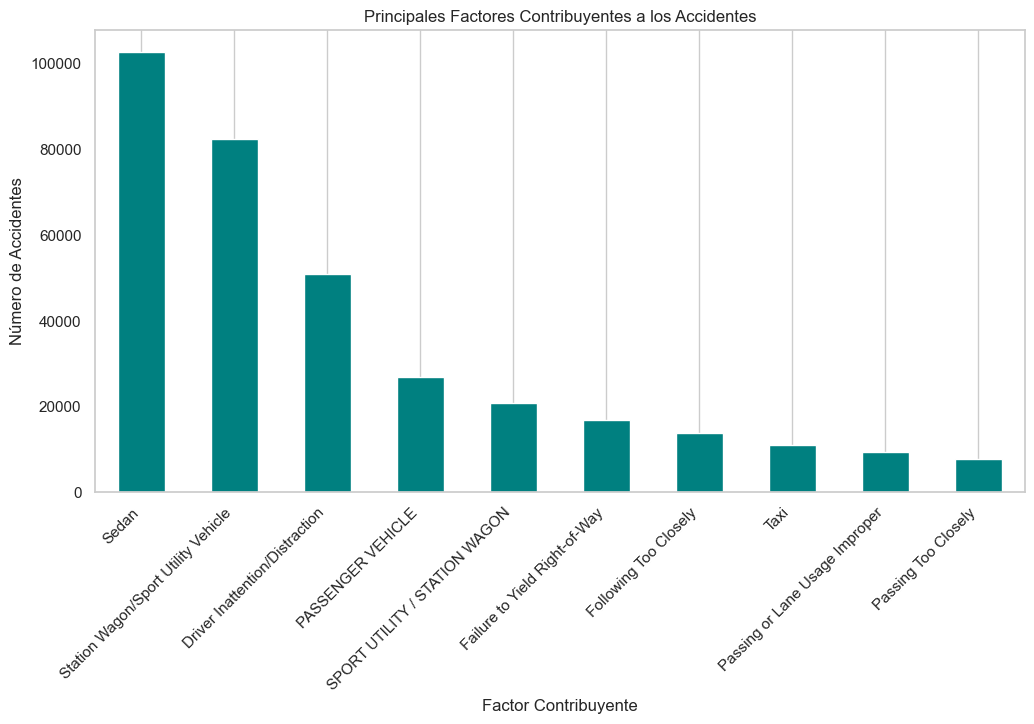

In [16]:
# Solución propuesta

# Análisis de factores contribuyentes a los accidentes
factor_series = pd.concat([data[col] for col in factor_cols], ignore_index=True)
factor_series = factor_series[factor_series != "Unspecified"]

# Contar ocurrencias únicas por factor
factor_counts = factor_series.value_counts()

# Graficar los factores más comunes
plt.figure(figsize=(12, 6))
factor_counts.head(10).plot(kind="bar", color='teal')
plt.xlabel("Factor Contribuyente")
plt.ylabel("Número de Accidentes")
plt.title("Principales Factores Contribuyentes a los Accidentes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

In [17]:
# Solución propuesta

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [18]:
# Solución propuesta

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

In [19]:
# Solución propuesta